**Importing required Libraries**

In [1]:
import numpy#for numerical analysis
import tensorflow#open source ml tool by google

In [2]:
from tensorflow.keras.datasets import mnist #mnist dataset
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers

In [3]:
from tensorflow.keras.layers import Dense,Flatten
from tensorflow.keras.layers import Conv2D
from tensorflow import keras

In [4]:
from tensorflow.keras.optimizers import Adam
from keras.utils import np_utils

**Loading dataset**

Dataset is available in tensorflow dataset repository

In [5]:
(x_train,y_train),(x_test,y_test)=mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [6]:
print(x_train.shape)
print(y_train.shape)

(60000, 28, 28)
(60000,)


In [7]:
print(x_test.shape)
print(y_test.shape)

(10000, 28, 28)
(10000,)


**Analyze the data**

In [25]:
x_train[3]

array([[[  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.]],

       [[  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.]],

       [[  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
    

In [9]:
y_train[3]

1

In [10]:
import matplotlib.pyplot as plt

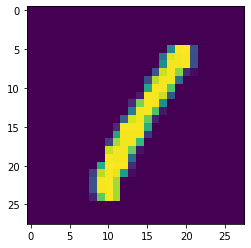

In [11]:
plt.imshow(x_train[3])

**Reshaping the data**

In [12]:
#(batch,height,width,channel)
x_train=x_train.reshape(60000,28,28,1).astype('float32')
x_test=x_test.reshape(10000,28,28,1).astype('float32')

**Applying one hot encoding**

In [13]:
no_of_classes=10
y_train=np_utils.to_categorical(y_train,no_of_classes)
y_test=np_utils.to_categorical(y_test,no_of_classes)

In [14]:
y_test[3]

array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

**Add CNN Layers**

In [15]:
model=Sequential()

model.add(Conv2D(64,(3,3),input_shape=(28,28,1),activation='relu'))
model.add(Conv2D(32,(3,3),activation='relu'))

model.add(Flatten())
model.add(Dense(no_of_classes,activation='softmax'))

**Compiling the model**

In [16]:
model.compile(loss='categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])


**Train the model**

In [17]:
model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=5,batch_size=32)


Epoch 1/5
1875/1875 [==============================] - 182s 96ms/step - loss: 0.2434 - accuracy: 0.9506 - val_loss: 0.0890 - val_accuracy: 0.9746
Epoch 2/5
1875/1875 [==============================] - 184s 98ms/step - loss: 0.0686 - accuracy: 0.9792 - val_loss: 0.0817 - val_accuracy: 0.9761
Epoch 3/5
1875/1875 [==============================] - 180s 96ms/step - loss: 0.0500 - accuracy: 0.9843 - val_loss: 0.0879 - val_accuracy: 0.9751
Epoch 4/5
1875/1875 [==============================] - 175s 94ms/step - loss: 0.0385 - accuracy: 0.9879 - val_loss: 0.0859 - val_accuracy: 0.9766
Epoch 5/5
1875/1875 [==============================] - 173s 92ms/step - loss: 0.0278 - accuracy: 0.9914 - val_loss: 0.1302 - val_accuracy: 0.9743


Observing the Metrics
**bold text**

In [18]:
metrics=model.evaluate(x_test,y_test,verbose=0)
print("metrics-score=>test loss & accuracy")
print(metrics)

metrics-score=>test loss & accuracy
[0.13022489845752716, 0.9743000268936157]


**Test the model**

In [19]:
prediction=model.predict(x_test[:5])
print(prediction)

1/1 [==============================] - 0s 83ms/step
[[3.4185439e-13 5.5741874e-24 1.4108578e-12 5.8982312e-11 8.8633264e-24
  1.7296551e-19 1.1825404e-27 1.0000000e+00 2.0502003e-15 5.3643347e-13]
 [2.3261268e-10 3.0212267e-12 1.0000000e+00 2.4511115e-15 1.3148062e-15
  2.6663117e-18 4.0791917e-08 5.0848124e-24 9.7937172e-17 2.9021448e-20]
 [1.1903730e-07 9.9797994e-01 8.2079403e-08 2.9906969e-11 2.0179800e-03
  3.1817416e-07 6.8299177e-10 3.3208425e-10 1.5256157e-06 3.4948405e-10]
 [9.9999988e-01 2.0383778e-15 2.3632422e-12 1.9513666e-14 8.6472290e-13
  1.9583915e-10 6.5154339e-08 2.2641159e-15 1.3765567e-12 2.1393830e-14]
 [7.3092357e-13 7.2467152e-16 1.7558748e-19 7.3679030e-19 1.0000000e+00
  8.0831583e-15 5.2094830e-18 1.0322817e-17 5.9578968e-15 1.1498401e-09]]


In [20]:
import numpy as np


[7 2 1 0 4]
[[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]]


In [21]:
print(np.argmax(prediction,axis=1))

[7 2 1 0 4]


In [22]:
print(y_test[:5])

[[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]]


**Save the Model**

In [23]:
model.save('models/mnistcnn.h5')

**Test the saved model**

X_train:(60000, 28, 28, 1)
y_train:(60000, 10)
X_test:(10000, 28, 28, 1)
y_test:(10000, 10)


NameError: ignored

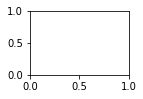

In [33]:
print('X_train:' +str(x_train.shape))
print('y_train:' +str(y_train.shape))
print('X_test:' +str(x_test.shape))
print('y_test:' +str(y_test.shape))
from matplotlib import pyplot
for i in range(9):
  pyplot.subplot(330+1+i)
  pyplot.imshow(X_train[i],cmap=pyplot.get_cmap('gray'))
  pyplot.show()

In [34]:
from tensorflow.keras.models import load_model
model=load_model('models/mnistcnn.h5')
from PIL import Image
for index in range(9):
  img=X_train[index].reshape((28,28))
  imgarray=np.array(img)
  imgarray=imgarray.reshape(1,28,28,1)
  y_pred=model.predict(imgarray)
  print(np.argmax(y_pred))

NameError: ignored